# Anomalies , Outliers Introduction to detection and Automation


## Introduction
 process of identifying unexpected items or events in data sets, which differ from the norm. And anomaly detection is often applied on unlabeled data which is known as unsupervised anomaly detection. Anomaly detection has two basic assumptions:
- Anomalies only occur very rarely in the data.
- Their features differ from the normal instances significantly
### Simply Anomalies are nothing other than the outliers in the data.


# Why do we need to Detect anomalies (Outliers)?
- Outliers can impact the results of our analysis and statistical modeling in a drastic way
- Anomaly detection algorithms in health care can point to health issues of patients and in the financial world, they can flag frauds.
## But here’s the caveat – outliers aren’t always a bad thing.
These are just observations that are not following the same pattern as the other ones. But it can be the case that an outlier is very interesting. For example, if in a biological experiment, a rat is not dead whereas all others are, then it would be very interesting to understand why. This could lead to new scientific discoveries.  So, it is important to detect outliers.”

# what are the types of anomalies ?
- Point Anomaly: A tuple in a dataset is said to be a Point Anomaly if it is far off from the rest of the data.
- Contextual Anomaly: An observation is a Contextual Anomaly if it is an anomaly because of the context of the observation.
- Collective Anomaly: A set of data instances help in finding an anomaly. 

 ## What are the methods used for detecting anomalies?
1. Using data visualization(like making use of boxplots, violin plots…etc)

2. Using Statistical methods like Quantile methods(IQR, Q1, Q3), Finding Minimum, Maximum, and median of the data, Z-score, etc.

3. ML algorithms 
 - Supervised Anomaly Detection: This method requires a labeled dataset containing both normal and anomalous samples to construct a predictive model to classify future data points. The most commonly used algorithms for this purpose are supervised Neural Networks, Support Vector Machine learning, K-Nearest Neighbors Classifier, etc.
 - Unsupervised Anomaly Detection: This method does require any training data and instead assumes two things about the data ie Only a small percentage of data is anomalous and Any anomaly is statistically different from the normal samples. Based on the above assumptions, the data is then clustered using a similarity measure and the data points which are far off from the cluster are considered to be anomalies.

## Why ML algorithms are the most important anmolie detector ?
Our tendency is to use straightforward methods like box plots, histograms and scatter-plots to detect outliers. But dedicated outlier detection algorithms are extremely valuable in fields which process large amounts of data and require a means to perform pattern recognition in larger datasets.

Applications like fraud detection in finance and intrusion detection in network security require intensive and accurate techniques to detect outliers. 

### PyOD library
PyOD is a scalable Python toolkit for detecting outliers in multivariate data. It provides access to around 20 outlier detection algorithms under a single well-documented API.



In this tutorial we will foucous on 2 algorthims only

 1- Isolation forest

 2- K Nearest Neighbors (KNN)

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [20]:
url = 'https://raw.githubusercontent.com/mesmalif/Practical_Machine_learning/develop_practical_ML/isolation_forest/data_set_A.csv'
df = pd.read_csv(url)
df.head()

,0,1
0,-1.534076,5.169982
1,1.452231,2.699340
2,0.861024,2.281911
3,1.546562,1.711730
4,3.088828,0.481944


## 1- Using data visualization( use of boxplots, violin plots ) 


Univariate Anomaly Detection



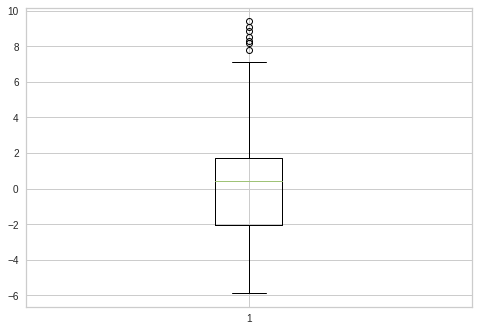

In [21]:
plt.boxplot(df['0']);


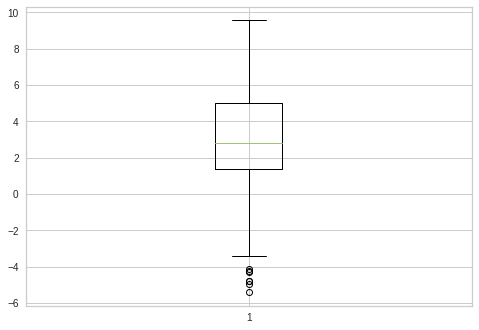

In [22]:
plt.boxplot(df['1']);


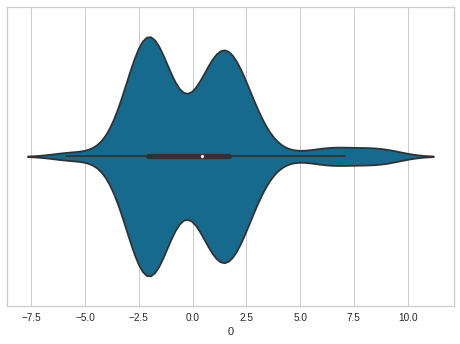

In [23]:
sns.violinplot(x=df['0'] , inner='box')

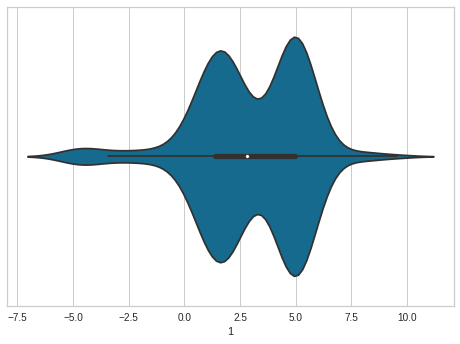

In [24]:
sns.violinplot(x=df['1'] , inner='box')

Multivriate Detection 

When we are in business, we expect some variables for examble Sales & Profit are positive correlated. If some of the Sales data points and Profit data points are not positive correlated, they would be considered as outliers and need to be further investigated.


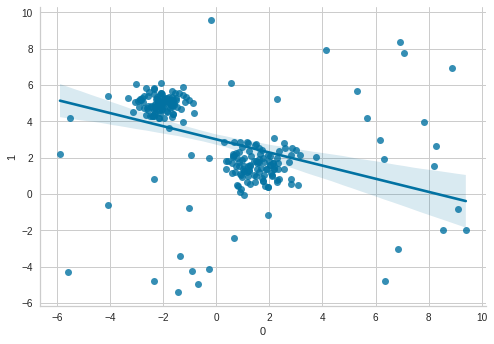

In [25]:

sns.regplot(x="0", y="1", data=df)
sns.despine();

## 2 - Using Statistical methods like Quantile methods(IQR, Q1, Q3)

In [26]:
df.describe()

,0,1
count,250.000000,250.000000
mean,0.126630,2.957091
std,2.704501,2.463476
min,-5.888766,-5.409809
25%,-2.067694,1.394351
50%,0.413196,2.810804
75%,1.705562,4.977583
max,9.399157,9.548513


In [36]:
from scipy import stats
X=df.values
x1= df['0'].values
x2 = df['1'].values
IQR_x1 = stats.iqr(x1, interpolation = 'midpoint')
IQR_x2= stats.iqr(x2, interpolation = 'midpoint')

In [66]:
#calcuting low and upper limit for first feature 
Q1_x1 = np.percentile(x1, 25, interpolation = 'midpoint') 
Q2_x1 = np.percentile(x1, 50, interpolation = 'midpoint') 
Q3_x1 = np.percentile(x1, 75, interpolation = 'midpoint') 
low_lim_x1 = Q1_x1 - (1.5 * IQR_x1)
up_lim_x1 = Q3_x1 + (1.5 * IQR_x1)
print('low_limit is', low_lim_x1)
print('up_limit is', up_lim_x1)


low_limit is -7.722067493672604
up_limit is 7.357011649223168


In [68]:
outlier_x1 = np.where((x1 <low_lim_x1)| (x1>up_lim_x1))
outlier_x1

(array([216, 220, 228, 232, 235, 243, 246]),)

In [67]:
#calcuting low and upper limit for first feature 
Q1_x2 = np.percentile(x2, 25, interpolation = 'midpoint') 
Q2_x2 = np.percentile(x2, 50, interpolation = 'midpoint') 
Q3_x2 = np.percentile(x2, 75, interpolation = 'midpoint') 
low_lim_x2 = Q1_x2 - (1.5 * IQR_x2)
up_lim_x2 = Q3_x2 + (1.5 * IQR_x2)
print('low_limit is', low_lim_x2)
print('up_limit is', up_lim_x2)

low_limit is -3.977808612073377
up_limit is 10.34875538807195


In [43]:
outlier_x2 = np.where((x2 <low_lim_x2 )| (x2>up_lim_x2))
outlier_x2

(array([214, 215, 217, 225, 230, 237, 248]),)

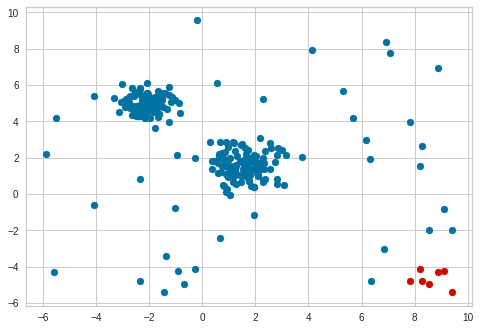

In [82]:
plt.scatter(X[: , 0], X[ : , 1])
plt.scatter(X[outlier_x1,0],X[outlier_x2 ,1] , color='r');
#plt.scatter(outlier_x1 , outlier_x2)

## 1- Isolation forest:
Is a tree based algorithm that tries to find how soon each point will be isolated if we grow the tree(s)

Converting dataframe into array


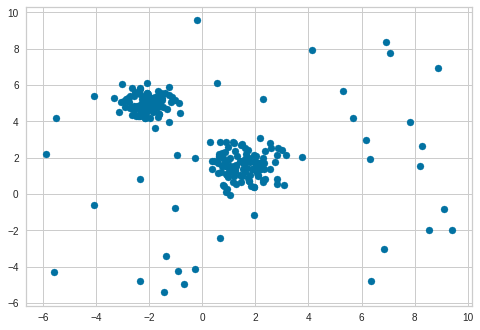

In [45]:
X= df.values
plt.scatter(X[: , 0] , X[:,1]);

Model Training -IsolationForest

In [46]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
predictions = clf.fit_predict(X)
clf.contamination

'auto'

In [48]:
predictions

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1

In [ ]:
clf.decision_function

In [49]:
anom = np.where(predictions < 0) 
anom

(array([213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226,
        228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
        241, 242, 243, 244, 245, 246, 247, 248, 249]),)

In [51]:
(predictions < 0).mean()

0.14

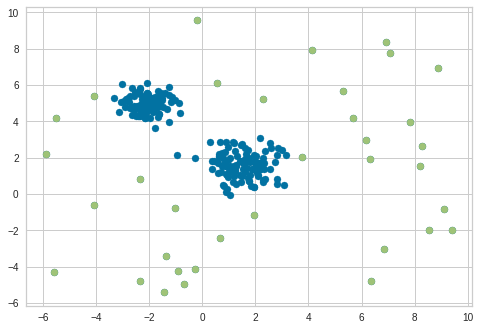

In [52]:
plt.scatter(X[: , 0] , X[:,1])
plt.scatter(X[anom , 0] , X[anom , 1])

## 2- K Nearest Neighbors (KNN):


In [53]:
from sklearn.neighbors import NearestNeighbors
X = df.values
nbr = NearestNeighbors()
nbr.fit(X)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [54]:
nbr.n_neighbors

5

In [55]:
nbr.kneighbors(X)

(array([[0.        , 0.0829951 , 0.12113547, 0.15227371, 0.17672986],
        [0.        , 0.07493768, 0.23445492, 0.27389498, 0.33677057],
        [0.        , 0.11891007, 0.23259311, 0.27085043, 0.29036663],
        ...,
        [0.        , 1.44833534, 1.55409781, 1.56461387, 1.61581551],
        [0.        , 0.85156381, 1.10251358, 1.28527883, 1.72761841],
        [0.        , 0.59666731, 0.83665398, 0.95014126, 1.03253704]]),
 array([[  0,  39, 159,  84,  53],
        [  1, 183, 203, 113, 196],
        [  2,  16, 132,   9,  90],
        ...,
        [247, 172,  41, 202, 105],
        [248, 217, 230, 237, 215],
        [249, 118, 123,  42, 157]]))

In [56]:
distancses , indexes = nbr.kneighbors(X)

In [57]:
distancses.mean(axis=1)

array([0.10662683, 0.18401163, 0.18254405, 0.08281954, 0.46650722,
       0.5184984 , 0.31327112, 0.15913613, 0.08145262, 0.09357568,
       0.07692712, 0.17094572, 0.28277648, 0.10659115, 0.13790792,
       0.1573148 , 0.11594247, 0.17408595, 0.14452529, 0.19319119,
       0.19770139, 0.38029077, 0.10417891, 0.19641358, 0.08402891,
       0.18951981, 0.1668323 , 0.17711045, 0.04024322, 0.0595296 ,
       0.18396066, 0.26136947, 0.32056937, 0.10127843, 0.13970025,
       0.11241175, 0.25674328, 0.18225898, 0.06216229, 0.09339432,
       0.20123638, 0.19210117, 0.29858692, 0.19917889, 0.18232439,
       0.18751936, 0.0809301 , 0.07253639, 0.07243677, 0.09289392,
       0.07688212, 0.45789485, 0.0974275 , 0.11022558, 0.29574099,
       0.17460771, 0.13575959, 0.15982671, 0.23793339, 0.11390013,
       0.33394939, 0.23688918, 0.08120925, 0.34193694, 0.18083409,
       0.06355383, 0.34152975, 0.1484961 , 0.11285362, 0.10039835,
       0.28807564, 0.19526769, 0.07781536, 0.1055758 , 0.07571

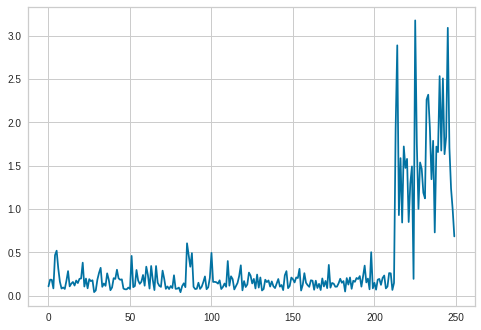

In [58]:
plt.plot(distancses.mean(axis=1));

In [59]:
np.where(distancses.mean(axis=1) > .5)

(array([  5,  85, 198, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
        223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236,
        237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249]),)

In [60]:
abn_index = np.where(distancses.mean(axis=1) > .5)

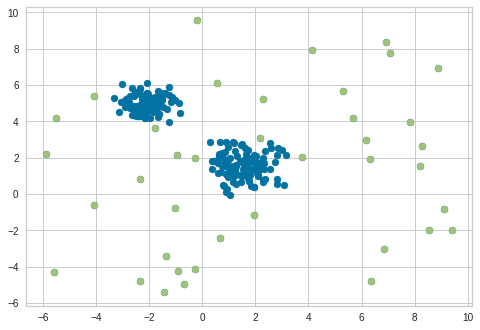

In [61]:
plt.scatter(X[: , 0] , X[:,1]);
plt.scatter(X[abn_index , 0] , X[abn_index , -1])

#Anomaly Detection Using Pycaret


PyCaret’s Anomaly Detection Module is an unsupervised machine learning module that is used for identifying rare items, events or observations which raise suspicions by differing significantly from the majority of the data. Typically, the anomalous items will translate to some kind of problem such as bank fraud, a structural defect, medical problems or errors . This module provide several pre-processing features that prepares the data for modeling through setup function. This module has over 12 ready-to-use algorithms and several plots to analyze the results of trained models.

import the dataset from pycaret repository


In [62]:
#!pip install pycaret

from pycaret.datasets import get_data
anomaly = get_data('anomaly')
#import anomaly detection module
from pycaret.anomaly import *
#intialize the setup
exp_ano = setup(anomaly)




,Description,Value
0,session_id,8666
1,Original Data,"(1000, 10)"
2,Missing Values,False
3,Numeric Features,10
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 10)"
9,CPU Jobs,-1


In [63]:
anomaly

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754
...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755


In [64]:
## creating a model usinf isolate forest 
iforest = create_model('iforest')
#plot model
plot_model(iforest)

In [65]:
## creating a model usinf knn model 
knn = create_model('knn')
#plot model
plot_model(knn)

Refrencses 
- https://www.analyticsvidhya.com/blog/2021/04/dealing-with-anomalies-in-the-data/
- https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1
- https://www.youtube.com/watch?v=RwmttGrJs08
- https://www.geeksforgeeks.org/machine-learning-for-anomaly-detection/
- https://www.analyticsvidhya.com/blog/2019/02/outlier-detection-python-pyod/
- https://www.kdnuggets.com/2021/04/automated-anomaly-detection-pycaret.html
- https://pycaret.org/anomaly-detection/
```
# This is formatted as code
```

